# Text-guided image-inpainting

The [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline) allows you to edit specific parts of an image by providing a mask and a text prompt. It uses a version of Stable Diffusion, like [`runwayml/stable-diffusion-inpainting`](https://huggingface.co/runwayml/stable-diffusion-inpainting) specifically trained for inpainting tasks.

Get started by loading an instance of the [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline):

In [1]:
import PIL
from PIL import Image
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [4]:
import matplotlib.pyplot as plt

Download an image and a mask of a dog which you'll eventually replace:

In [10]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


# img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
# mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

# img_url = "image_313.jpg"
# mask_url = "mask.webp"

# Load local image files
size = Image.open("image_313.jpg").size
init_image = Image.open("image_313.jpg").resize((1024, 1024))
mask_image = Image.open("mask.webp").resize((1024, 1024))
blurred_mask = pipeline.mask_processor.blur(mask_image, blur_factor=3)
# init_image = download_image(img_url).resize((512, 512))
# mask_image = download_image(mask_url).resize((512, 512))

Now you can create a prompt to replace the mask with something else:

  0%|          | 0/50 [00:00<?, ?it/s]

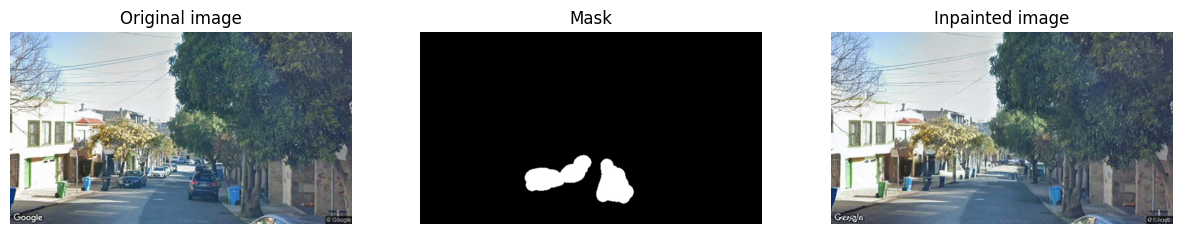

In [12]:
prompt = "Empty street"
image = pipeline(prompt=prompt, image=init_image, mask_image=blurred_mask).images[0]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(init_image.resize(size))
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask_image.resize(size))
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image.resize(size))
plt.title("Inpainted image")
plt.axis("off")
plt.show()